In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

In [90]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [91]:
with open("p1.json") as file:
    data = json.load(file)
    
print (len(data))

21


In [92]:
minv = [float(x['ncloc']) for x in data]
print (minv)
majv = [float(x['functions']) for x in data]
print (majv)

for i in range(10):
    minv.append(i)
    majv.append(1)
for i in range(30):
    minv.append(i)
    majv.append(2)
minv.append(20000)
majv.append(1200)
minv.append(30000)
majv.append(2000)
minv.append(35000)
majv.append(2200)
minv.append(50000)
majv.append(3500)
minv.append(60000)
majv.append(4000)
minv.append(61000)
majv.append(4020)
minv.append(80000)
majv.append(5100)

[195.0, 108265.0, 9838.0, 26166.0, 5867.0, 684.0, 6737.0, 12984.0, 916.0, 10338.0, 41315.0, 2338.0, 9112.0, 619.0, 739.0, 9032.0, 89384.0, 1058.0, 64546.0, 430.0, 2969.0]
[16.0, 2697.0, 759.0, 2917.0, 609.0, 36.0, 312.0, 962.0, 116.0, 626.0, 2472.0, 212.0, 1298.0, 46.0, 41.0, 489.0, 5947.0, 100.0, 5540.0, 21.0, 261.0]


In [93]:
for i in range(len(minv) - 1):
    for j in range(i+1, len(minv)):
        if minv[i] > minv[j]:
            minv[i], minv[j] = minv[j], minv[i]
            majv[i], majv[j] = majv[j], majv[i]
print (minv)
print (majv)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 195.0, 430.0, 619.0, 684.0, 739.0, 916.0, 1058.0, 2338.0, 2969.0, 5867.0, 6737.0, 9032.0, 9112.0, 9838.0, 10338.0, 12984.0, 20000, 26166.0, 30000, 35000, 41315.0, 50000, 60000, 61000, 64546.0, 80000, 89384.0, 108265.0]
[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 16.0, 21.0, 46.0, 36.0, 41.0, 116.0, 100.0, 212.0, 261.0, 609.0, 312.0, 489.0, 1298.0, 759.0, 626.0, 962.0, 1200, 2917.0, 2000, 2200, 2472.0, 3500, 4000, 4020, 5540.0, 5100, 5947.0, 2697.0]


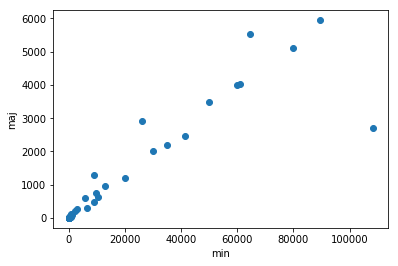

In [94]:
x = np.array(minv)
y = np.array(majv)

plt.scatter(x, y)
plt.xlabel("min")
plt.ylabel("maj")
plt.show()

In [95]:
print (x)

[0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00
 3.00000e+00 3.00000e+00 4.00000e+00 4.00000e+00 5.00000e+00 5.00000e+00
 6.00000e+00 6.00000e+00 7.00000e+00 7.00000e+00 8.00000e+00 8.00000e+00
 9.00000e+00 9.00000e+00 1.00000e+01 1.10000e+01 1.20000e+01 1.30000e+01
 1.40000e+01 1.50000e+01 1.60000e+01 1.70000e+01 1.80000e+01 1.90000e+01
 2.00000e+01 2.10000e+01 2.20000e+01 2.30000e+01 2.40000e+01 2.50000e+01
 2.60000e+01 2.70000e+01 2.80000e+01 2.90000e+01 1.95000e+02 4.30000e+02
 6.19000e+02 6.84000e+02 7.39000e+02 9.16000e+02 1.05800e+03 2.33800e+03
 2.96900e+03 5.86700e+03 6.73700e+03 9.03200e+03 9.11200e+03 9.83800e+03
 1.03380e+04 1.29840e+04 2.00000e+04 2.61660e+04 3.00000e+04 3.50000e+04
 4.13150e+04 5.00000e+04 6.00000e+04 6.10000e+04 6.45460e+04 8.00000e+04
 8.93840e+04 1.08265e+05]


In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train = np.atleast_2d(X_train).T
y_train = np.atleast_2d(y_train).T
X_test = np.atleast_2d(X_test).T
y_testt = np.atleast_2d(y_test).T

In [97]:
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [98]:
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(test_score)

0.97524696569427


In [102]:
print (rf.predict(120))

[10.848]
